<a href="https://colab.research.google.com/github/AlanGranea/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importación de datos



In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#2. Análisis de facturación



El ingreso de la tienda 1 es de 1,150,880,400.00 dolares
El ingreso de la tienda 2 es de 1,116,343,500.00 dolares
El ingreso de la tienda 3 es de 1,098,019,600.00 dolares
El ingreso de la tienda 4 es de 1,038,375,700.00 dolares


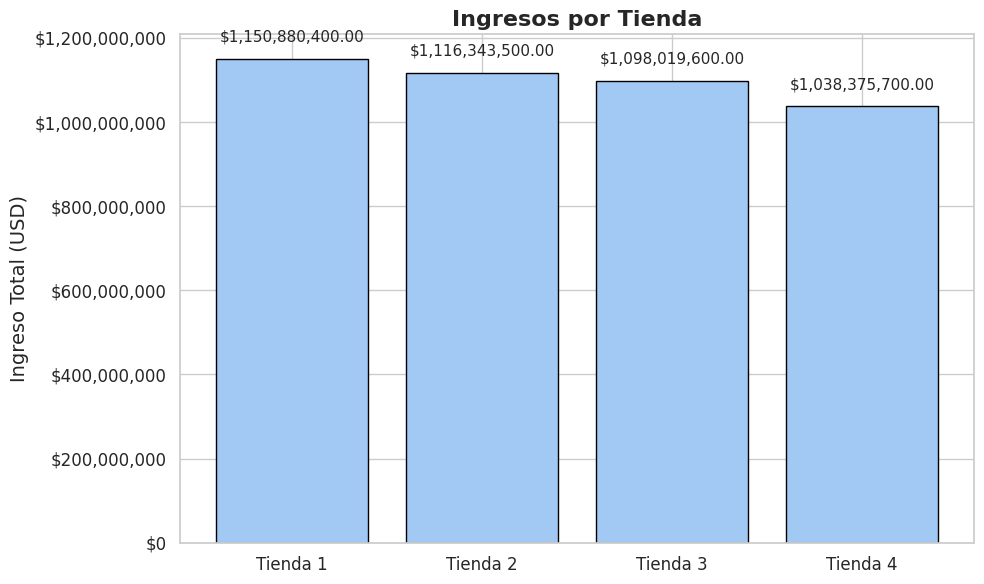

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

ingreso1 = tienda["Precio"].sum()
ingreso2 = tienda2["Precio"].sum()
ingreso3 = tienda3["Precio"].sum()
ingreso4 = tienda4["Precio"].sum()

print(f'El ingreso de la tienda 1 es de {ingreso1:,.2f} dolares')
print(f'El ingreso de la tienda 2 es de {ingreso2:,.2f} dolares')
print(f'El ingreso de la tienda 3 es de {ingreso3:,.2f} dolares')
print(f'El ingreso de la tienda 4 es de {ingreso4:,.2f} dolares')

ingresos = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Total": [ingreso1, ingreso2, ingreso3, ingreso4]
})

sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(ingresos["Tienda"], ingresos["Total"], edgecolor='black')

for barra in barras:
    valor = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, valor + 0.03 * valor,
            f"${valor:,.2f}", ha='center', va='bottom', fontsize=11)

ax.set_ylabel("Ingreso Total (USD)", fontsize=14)
ax.set_title("Ingresos por Tienda", fontsize=16, weight='bold')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 3. Ventas por categoría


Estas son las ventas por categoría de la Tienda 1:
 Categoría del Producto  Cantidad
Artículos para el hogar       171
                 Libros       173
 Instrumentos musicales       182
   Deportes y diversión       284
      Electrodomésticos       312
               Juguetes       324
           Electrónicos       448
                Muebles       465


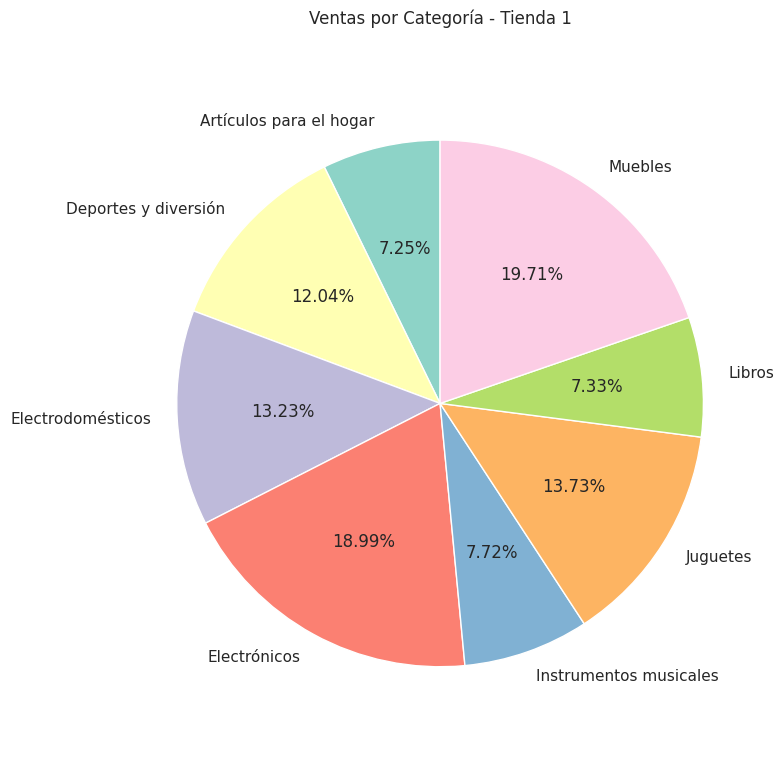


Estas son las ventas por categoría de la Tienda 2:
 Categoría del Producto  Cantidad
Artículos para el hogar       181
                 Libros       197
 Instrumentos musicales       224
   Deportes y diversión       275
      Electrodomésticos       305
               Juguetes       313
           Electrónicos       422
                Muebles       442


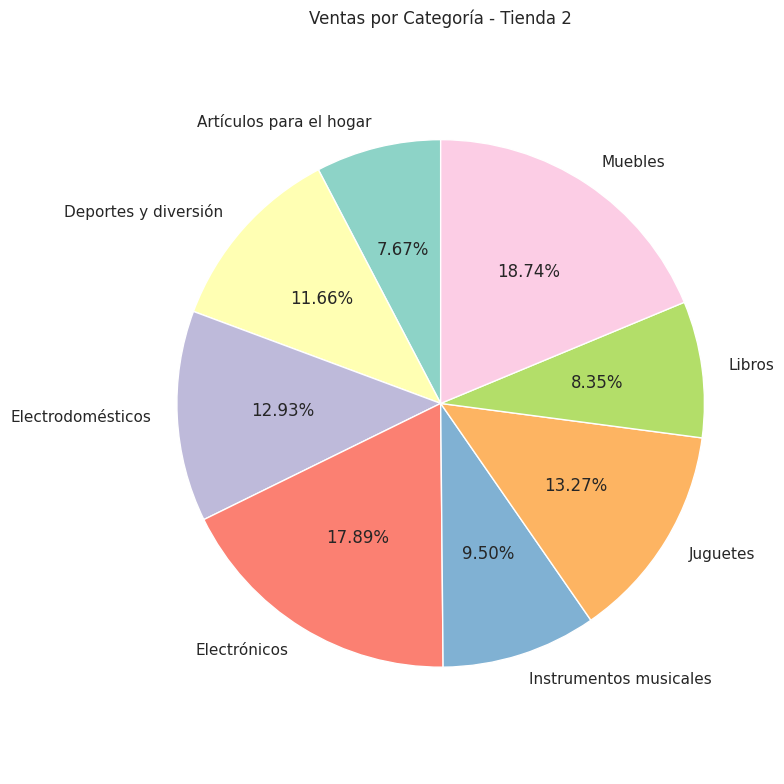


Estas son las ventas por categoría de la Tienda 3:
 Categoría del Producto  Cantidad
Artículos para el hogar       177
 Instrumentos musicales       177
                 Libros       185
   Deportes y diversión       277
      Electrodomésticos       278
               Juguetes       315
           Electrónicos       451
                Muebles       499


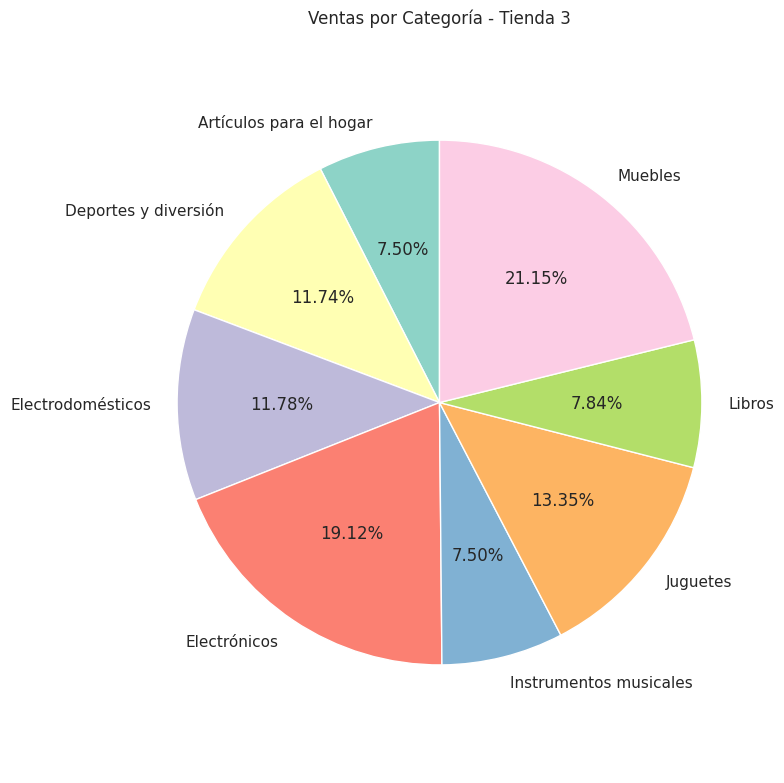


Estas son las ventas por categoría de la Tienda 4:
 Categoría del Producto  Cantidad
 Instrumentos musicales       170
                 Libros       187
Artículos para el hogar       201
      Electrodomésticos       254
   Deportes y diversión       277
               Juguetes       338
           Electrónicos       451
                Muebles       480


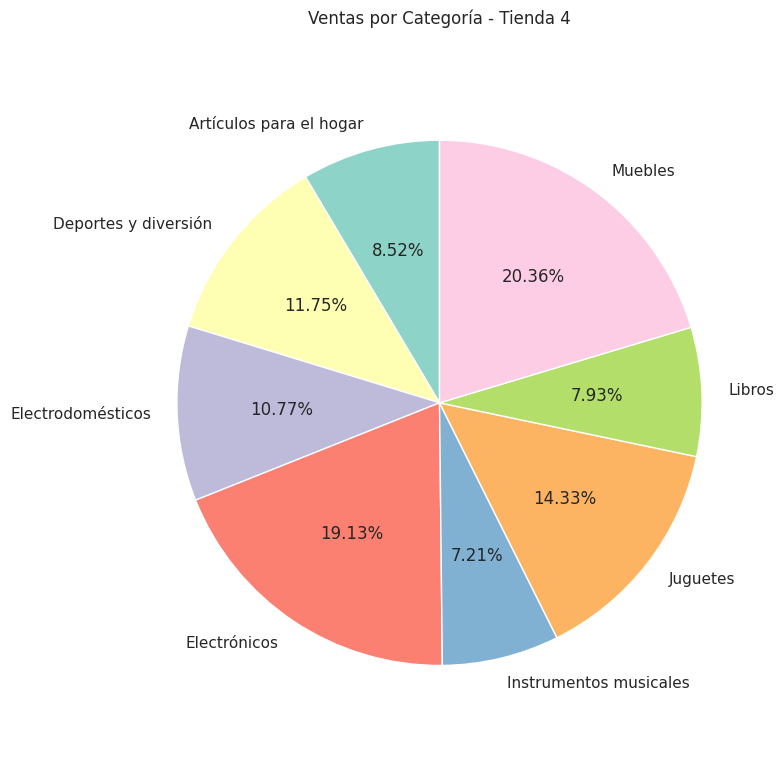

In [13]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

for i, tienda_actual in enumerate(tiendas):
    tienda_limpia = tienda_actual.dropna(subset=["Categoría del Producto"])
    tienda_limpia = tienda_limpia[tienda_limpia["Categoría del Producto"].str.strip() != ""]

    ventas = tienda_limpia.groupby("Categoría del Producto").size().reset_index(name="Cantidad")

    print(f"\nEstas son las ventas por categoría de la {nombres_tiendas[i]}:")
    print(ventas.sort_values(by="Cantidad").to_string(index=False))

    plt.figure(figsize=(8, 8))
    plt.pie(
        ventas["Cantidad"],
        labels=ventas["Categoría del Producto"],
        autopct='%1.2f%%',
        startangle=90,
        colors=plt.cm.Set3.colors
    )
    plt.title(f"Ventas por Categoría - {nombres_tiendas[i]}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# 4. Calificación promedio de la tienda


In [14]:
promedio_tienda1 = tienda["Calificación"].mean()
promedio_tienda2 = tienda2["Calificación"].mean()
promedio_tienda3 = tienda3["Calificación"].mean()
promedio_tienda4 = tienda4["Calificación"].mean()

print(f'La calificación promedio de la tienda 1 es de {promedio_tienda1:.2f} estrellas')
print(f'La calificación promedio de la tienda 2 es de {promedio_tienda2:.2f} estrellas')
print(f'La calificación promedio de la tienda 3 es de {promedio_tienda3:.2f} estrellas')
print(f'La calificación promedio de la tienda 4 es de {promedio_tienda4:.2f} estrellas')

La calificación promedio de la tienda 1 es de 3.98 estrellas
La calificación promedio de la tienda 2 es de 4.04 estrellas
La calificación promedio de la tienda 3 es de 4.05 estrellas
La calificación promedio de la tienda 4 es de 4.00 estrellas


# 5. Productos más y menos vendidos


🟢 Productos más vendidos de Tienda 1:
  - Microondas: 60 vendidos
  - TV LED UHD 4K: 60 vendidos
  - Armario: 60 vendidos
  - Secadora de ropa: 58 vendidos
  - Mesa de noche: 56 vendidos

🔴 Productos menos vendidos de Tienda 1:
  - Ciencia de datos con Python: 39 vendidos
  - Pandereta: 36 vendidos
  - Olla de presión: 35 vendidos
  - Auriculares con micrófono: 33 vendidos
  - Celular ABXY: 33 vendidos

🟢 Productos más vendidos de Tienda 2:
  - Iniciando en programación: 65 vendidos
  - Microondas: 62 vendidos
  - Batería: 61 vendidos
  - Guitarra acústica: 58 vendidos
  - Pandereta: 58 vendidos

🔴 Productos menos vendidos de Tienda 2:
  - Auriculares: 37 vendidos
  - Sillón: 35 vendidos
  - Mesa de comedor: 34 vendidos
  - Impresora: 34 vendidos
  - Juego de mesa: 32 vendidos

🟢 Productos más vendidos de Tienda 3:
  - Kit de bancas: 57 vendidos
  - Mesa de comedor: 56 vendidos
  - Cama king: 56 vendidos
  - Set de ollas: 55 vendidos
  - Mesa de noche: 55 vendidos

🔴 Productos menos v

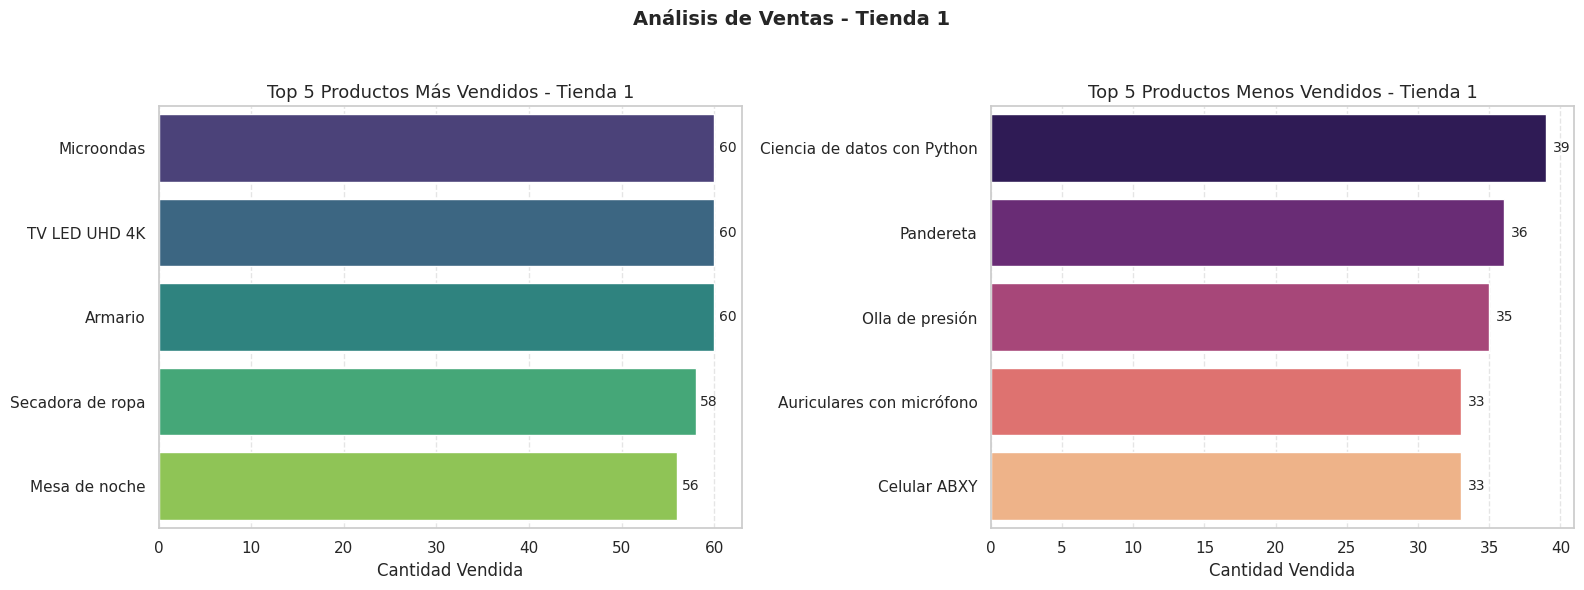

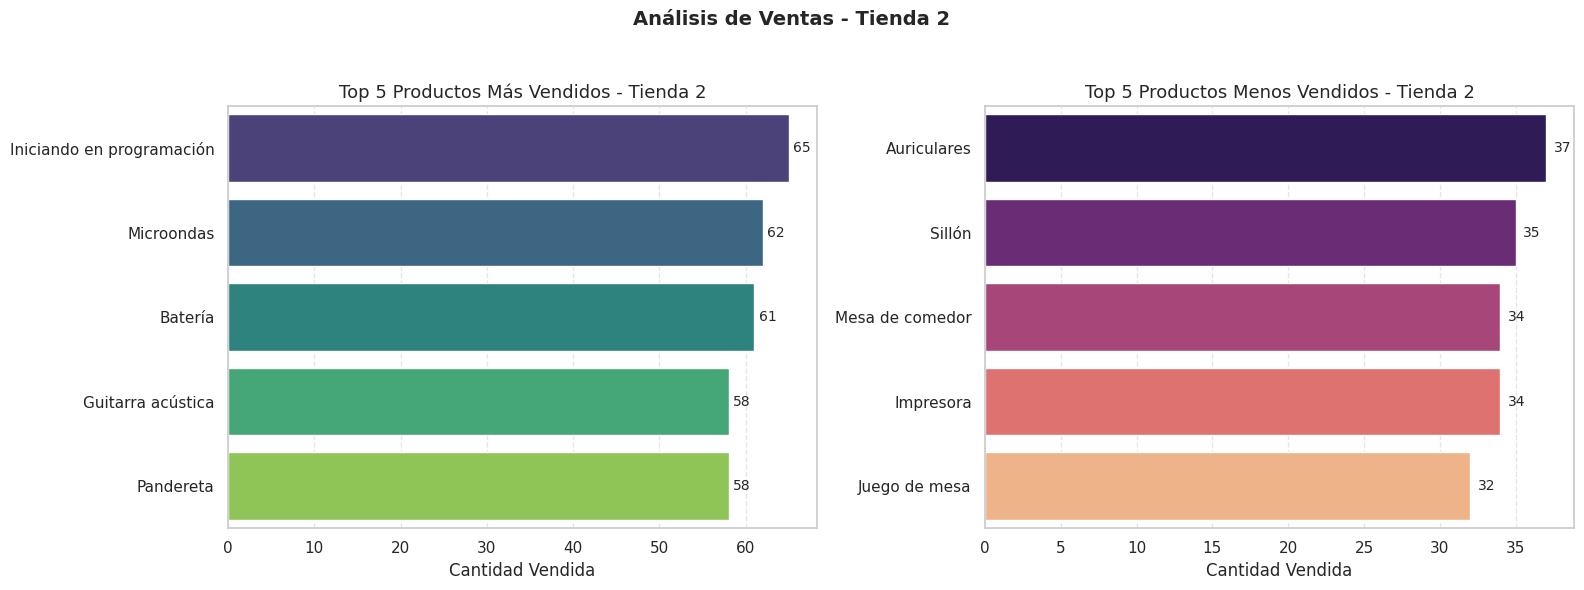

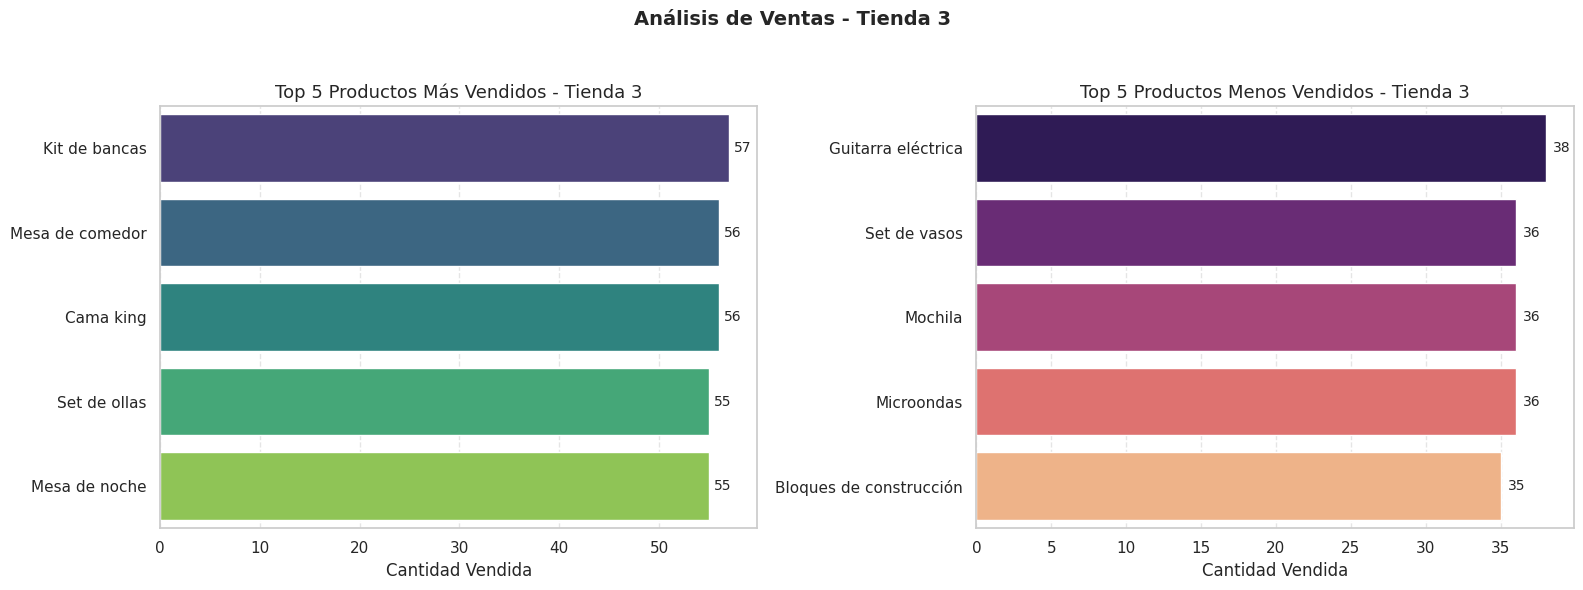

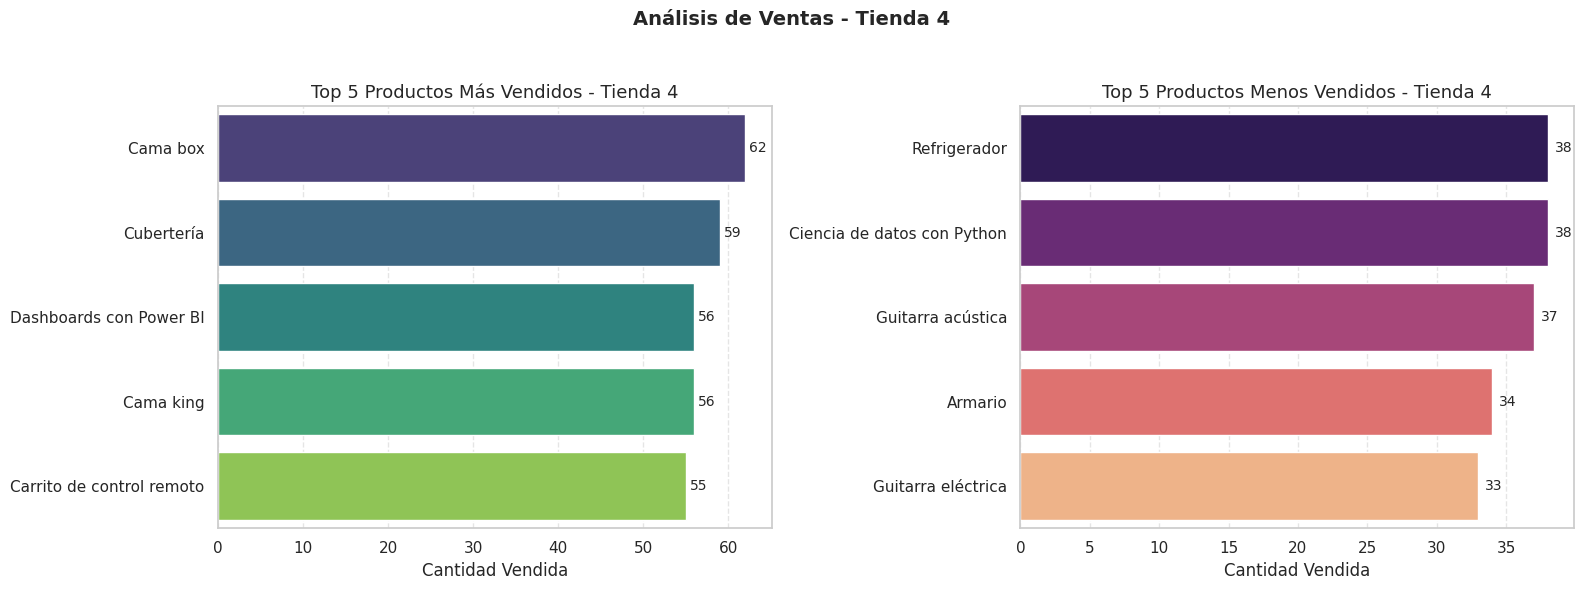

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

productos_top = {}
productos_fondo = {}

for nombre_tienda, df in tiendas.items():
    df = df.copy()
    df['Producto'] = df['Producto'].str.strip()

    top = df['Producto'].value_counts().head(5)
    fondo = df['Producto'].value_counts().tail(5)

    productos_top[nombre_tienda] = top
    productos_fondo[nombre_tienda] = fondo

    print(f"\n🟢 Productos más vendidos de {nombre_tienda}:")
    for producto, cantidad in top.items():
        print(f"  - {producto}: {cantidad} vendidos")

    print(f"\n🔴 Productos menos vendidos de {nombre_tienda}:")
    for producto, cantidad in fondo.items():
        print(f"  - {producto}: {cantidad} vendidos")

sns.set(style="whitegrid")

for nombre_tienda in tiendas:
    top = productos_top[nombre_tienda]
    fondo = productos_fondo[nombre_tienda]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.barplot(x=top.values, y=top.index, hue=top.index, ax=axes[0], palette="viridis", legend=False)
    axes[0].set_title(f"Top 5 Productos Más Vendidos - {nombre_tienda}", fontsize=13)
    axes[0].set_xlabel('Cantidad Vendida')
    axes[0].set_ylabel('')
    axes[0].grid(axis='x', linestyle='--', alpha=0.5)
    for i, v in enumerate(top.values):
        axes[0].text(v + 0.5, i, f"{v}", va='center', ha='left', fontsize=10)

    sns.barplot(x=fondo.values, y=fondo.index, hue=fondo.index, ax=axes[1], palette="magma", legend=False)
    axes[1].set_title(f"Top 5 Productos Menos Vendidos - {nombre_tienda}", fontsize=13)
    axes[1].set_xlabel('Cantidad Vendida')
    axes[1].set_ylabel('')
    axes[1].grid(axis='x', linestyle='--', alpha=0.5)
    for i, v in enumerate(fondo.values):
        axes[1].text(v + 0.5, i, f"{v}", va='center', ha='left', fontsize=10)

    plt.suptitle(f"Análisis de Ventas - {nombre_tienda}", fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 6. Envío promedio por tienda

In [16]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

costos_promedio_envio = {}
gasto_total_envio = {}

for nombre_tienda, df in tiendas.items():
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce').fillna(0)

    costo_promedio = df['Costo de envío'].mean()
    costos_promedio_envio[nombre_tienda] = round(costo_promedio, 2)

    gasto_total = df['Costo de envío'].sum()
    gasto_total_envio[nombre_tienda] = round(gasto_total, 2)

for nombre_tienda in tiendas.keys():
    print(f"El costo promedio de envío de la {nombre_tienda} es de {costos_promedio_envio[nombre_tienda]} dólares y el gasto total de envío es de {gasto_total_envio[nombre_tienda]} dólares")

resultado_envios = pd.DataFrame({
    'Costo Promedio': costos_promedio_envio,
    'Gasto Total': gasto_total_envio
})

print("\nResumen de costos y gastos de envío por tienda:")
print(resultado_envios)

El costo promedio de envío de la Tienda 1 es de 26018.61 dólares y el gasto total de envío es de 61377900.0 dólares
El costo promedio de envío de la Tienda 2 es de 25216.24 dólares y el gasto total de envío es de 59485100.0 dólares
El costo promedio de envío de la Tienda 3 es de 24805.68 dólares y el gasto total de envío es de 58516600.0 dólares
El costo promedio de envío de la Tienda 4 es de 23459.46 dólares y el gasto total de envío es de 55317400.0 dólares

Resumen de costos y gastos de envío por tienda:
          Costo Promedio  Gasto Total
Tienda 1        26018.61   61377900.0
Tienda 2        25216.24   59485100.0
Tienda 3        24805.68   58516600.0
Tienda 4        23459.46   55317400.0


# 7. Análisis del desempeño geográfico


In [17]:
!pip install contextily

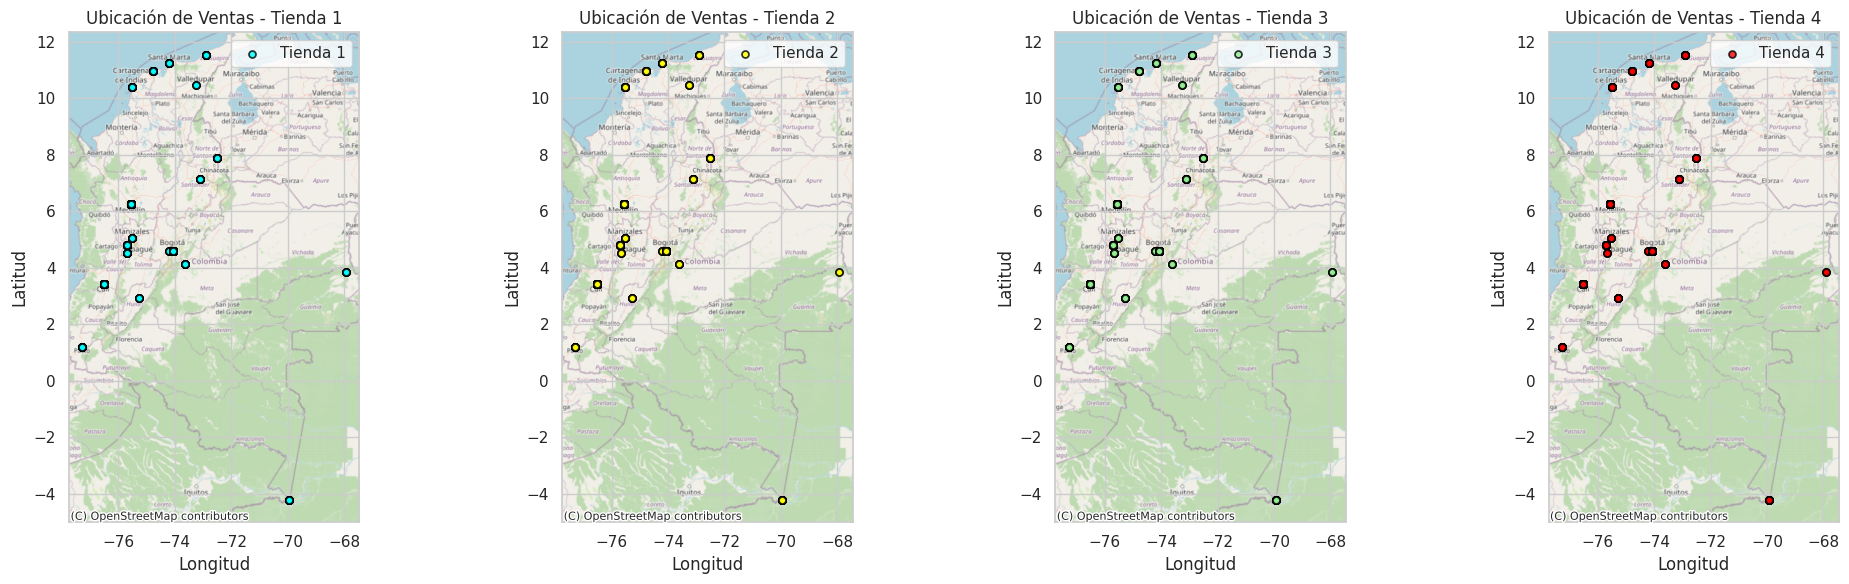

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])
geometry = geopandas.points_from_xy(tiendas['lon'], tiendas['lat'])
tiendas_geo = geopandas.GeoDataFrame(tiendas, geometry=geometry, crs="EPSG:4326")

try:
    colombia = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    colombia = colombia[colombia['name'] == 'Colombia']
    colombia = colombia.to_crs("EPSG:4326")
except:
    colombia = None
    mapa_cargado = False

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

for idx, (nombre_tienda, color) in enumerate([('Tienda 1', 'cyan'), ('Tienda 2', 'yellow'), ('Tienda 3', '#90EE90'), ('Tienda 4', 'red')]):
    ax = axes[idx]

    if colombia is not None:
        colombia.plot(ax=ax, color='lightgray', alpha=0.7)

    data_tienda = tiendas_geo[tiendas_geo['Tienda'] == nombre_tienda]
    data_tienda.plot(ax=ax,
                     color=color,
                     marker='o',
                     label=nombre_tienda,
                     alpha=0.8,
                     markersize=25,
                     edgecolor='black',
                     linewidth=1.25)

    ax.set_title(f'Ubicación de Ventas - {nombre_tienda}')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.legend()
    ax.grid(True)

    try:
        import contextily as ctx
        ctx.add_basemap(ax, crs=data_tienda.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
    except ImportError:
        print("contextily no está instalado, el mapa base no se mostrará. Instálalo con: pip install contextily")

plt.tight_layout()
plt.show()

# 8. Conclusión Final: Recomendación sobre la Tienda a Vender

El presente informe tiene como finalidad asesorar al Sr. Juan en la toma de decisión respecto a cuál de sus 4 tiendas vender para iniciar un nuevo emprendimiento. La investigación se basa en los siguientes factores:

* **Ingresos totales** por tienda
* **Calificaciones promedio** de los clientes
* **Coste de envío promedio** por tienda

---

A continuación, estos son los hallazgos correspondientes a cada tienda según los resultados del análisis de datos:

🟢 Tienda 2 y Tienda 3: Ambas poseen un balance sólido entre ingresos, buenas calificaciones por parte de los clientes y un coste de envío razonable. Son las más aptas para mantenerse activas y servir de referencia para mejoras en otras tiendas.

🟡 Tienda 1: Posee el ingreso total más alto, evidenciando una fuerte demanda y un flujo constante de clientes. No obstante, presenta la calificación más baja, y además, el mayor coste de envío promedio, lo que puede traducirse en mayores gastos operativos a futuro.

🔴 Tienda 4: Aunque cuenta con el menor coste de envío, también presenta el ingreso total más bajo y un nivel de demanda muy inferior. Su calificación promedio, si bien no es la peor, está influenciada por el reducido volumen de clientes, lo que limita su crecimiento.

---

📌 Conclusión y Recomendación

Recomendaría vender la Tienda 4, ya que presenta el peor desempeño económico y un nivel de demanda muy bajo, lo cual compromete su rentabilidad futura. Si por alguna razón el Sr. Juan desea conservarla, es fundamental diseñar estrategias para atraer mayor flujo de clientes e idealmente adaptar las prácticas de la Tienda 1 (captación de consumidores) y de las Tiendas 2 y 3 (servicio al cliente).

Por otro lado, prestaría atención a la Tienda 1. Ya que si bien es la más rentable en términos de ingresos, sus debilidades en atención al cliente y costes de envío podrían afectar su rendimiento si no se corrigen oportunamente. Por lo que la mejor decisión sería vender la Tienda 4 y monitorear de cerca el desempeño de la Tienda 1 y fortalecerla al replicar las prácticas de las Tiendas 2 y 3 en toda la operación.